# Funcional

# Code Assigment 1

For this assignment you will use the following SVM implementation for classifying these datasets:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication


https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

You should:

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from models import SVM , train_validation_test_split


import matplotlib.pyplot as plt
import seaborn as sns

# Bank note model 

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.

In [2]:
# Load the dataset
df_bank_note = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', header=None)

df_bank_note.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

In [3]:
df_bank_note



,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


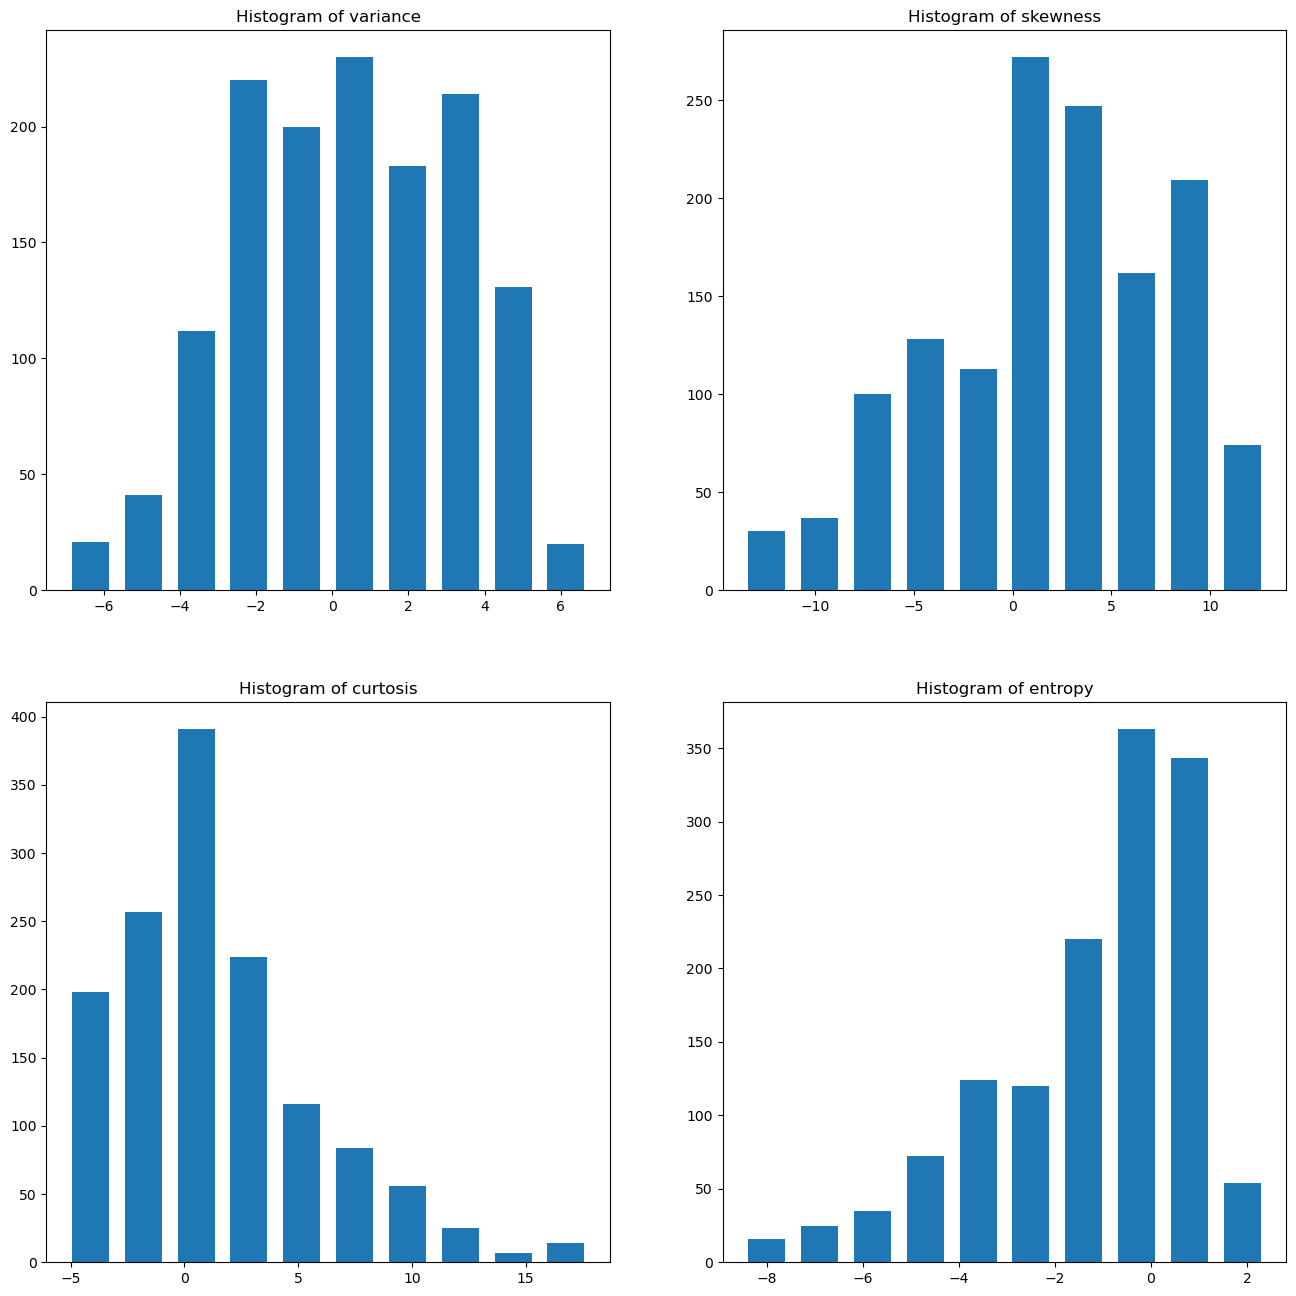

In [4]:
fig , axs = plt.subplots(2,2,figsize=(16,16))

count=0
for i in range(2):
    for j in range(2):
        column=df_bank_note.columns[count]
        axs[i,j].hist(df_bank_note[column],rwidth=0.7)
        axs[i,j].set_title(f'Histogram of {column}')
        count+=1

In [5]:
X =df_bank_note.drop('class',axis=1).values
y= df_bank_note['class'].replace(0,-1).values

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_val, X_test, y_train, y_val, y_test= train_validation_test_split(X, y)

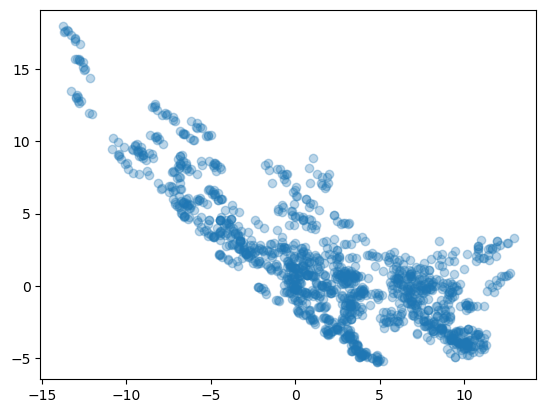

In [6]:
# Visualizing data

plt.scatter(df_bank_note['skewness'],df_bank_note['curtosis'],alpha=0.3)

<AxesSubplot: title={'center': 'Correlation Matrix'}>

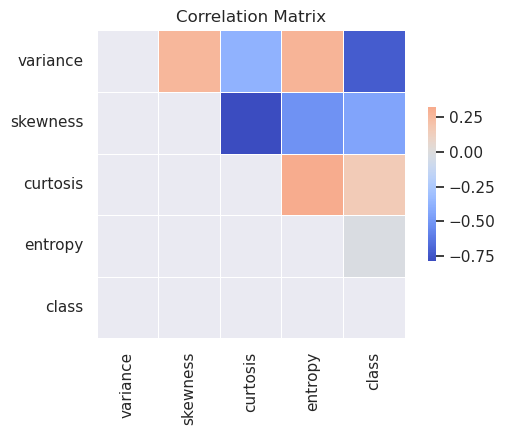

In [7]:
sns.set_theme(style="dark")
corr = df_bank_note.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)).T
f, ax = plt.subplots(figsize=(6,4))
ax.set_title("Correlation Matrix")
# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0,cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
svm = SVM()
svm.fit(X_train, y_train,X_val,y_val,learning_rate=0.001,epochs=50)

(array([[-2.76670809, -1.16708195,  0.41854208,  0.48375881]]),
 1.339,
 [1.0,
  0.6569023352753663,
  0.3426866937166703,
  0.11564201092966106,
  0.14528895834353514,
  0.17845895977056975,
  0.2143018931084475,
  0.2531556006273207,
  0.29439571317902014,
  0.340123617722806,
  0.3880515839668825,
  0.43945762341619193,
  0.4929503124338197,
  0.5497719048030119,
  0.6092022661863493,
  0.6696027470826804,
  0.7323420957867954,
  0.7982510891860555,
  0.8664402177105835,
  0.9368467500525367,
  1.0094091625430512,
  1.0840671182887252,
  1.1607614466528602,
  1.2407073206402783,
  1.322646280329219,
  1.4065206642120929,
  1.492273933832961,
  1.579850654299802,
  1.67047579982756,
  1.7628756242514592,
  1.8558608746330796,
  1.9504660383279744,
  2.048585267385387,
  2.1487034208747606,
  2.248010276122227,
  2.3465676128105546,
  2.4451673678175943,
  2.5435397076395727,
  2.6445387835401983,
  2.745735835035222,
  2.8447725130411823,
  2.9451566278758237,
  3.0471908756741057,
 

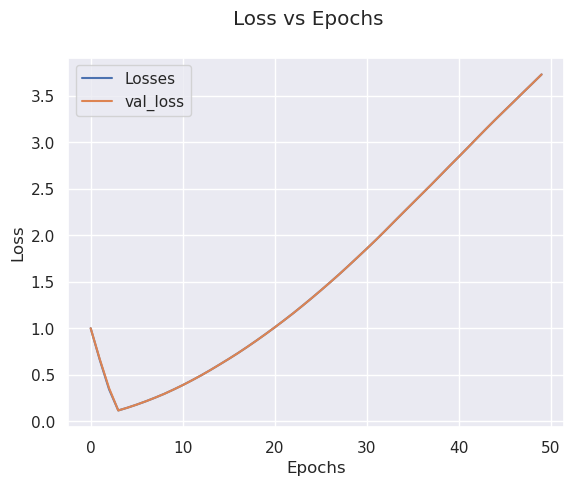

In [9]:
svm.plot_loss()

# Occupancy 

In [10]:
df_occupancy = pd.read_csv('occupancy_data/datatraining.txt')

In [11]:
df_occupancy

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [12]:
# convertir la columna de fechas a un objeto datetime
df_occupancy['date'] = pd.to_datetime(df_occupancy['date'])

# establecer la fecha de referencia
reference_date = pd.to_datetime('2015-02-04')

# convertir fechas a segundos desde la fecha de referencia
df_occupancy['date_seconds'] = (df_occupancy['date'] - reference_date).dt.total_seconds()

0
date
1
Temperature
2
Humidity
3
Light
4
CO2
5
HumidityRatio


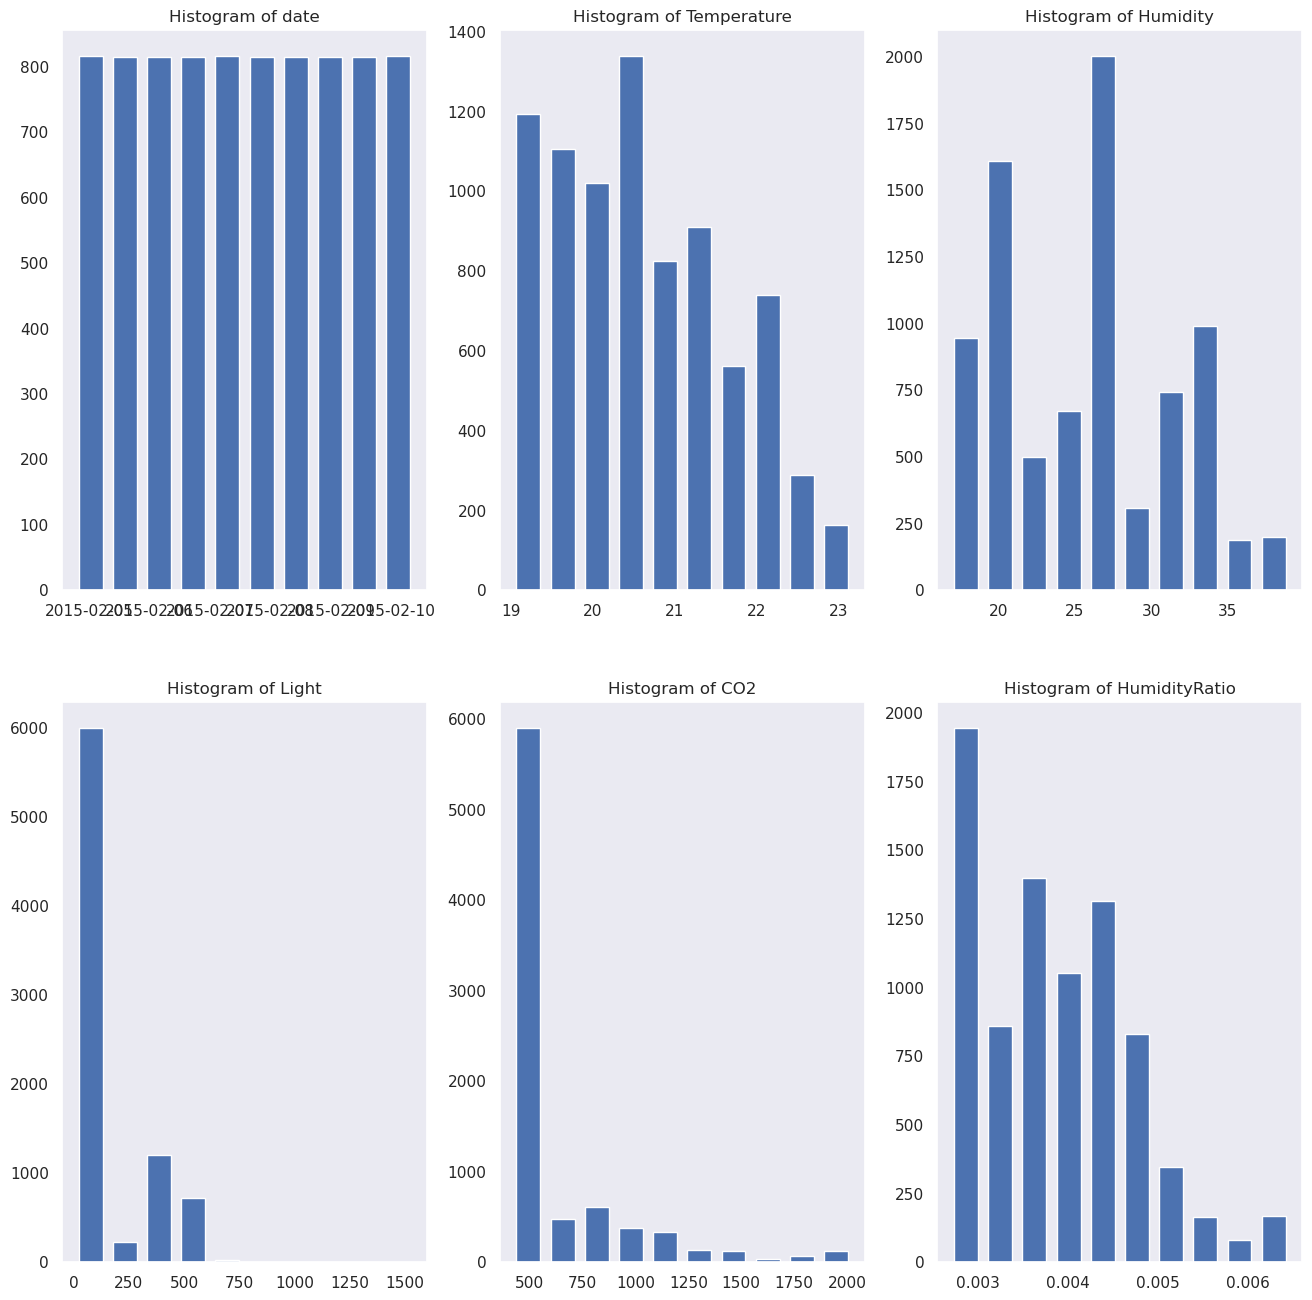

In [13]:
fig , axs = plt.subplots(2,3,figsize=(16,16))

count=0
for i in range(2):
    for j in range(3):
        print(count)
        column=df_occupancy.columns[count]
        axs[i,j].hist(df_occupancy[column],rwidth=0.7)
        print(column)
        axs[i,j].set_title(f'Histogram of {column}')
        count+=1

In [14]:
X =df_occupancy.drop(['Occupancy','date'],axis=1).values
y= df_occupancy['Occupancy'].replace(0,-1)
y= y.values

# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'StandardScaler' is not defined

In [ ]:
df_occupancy.drop(['Occupancy','date'],axis=1)

,Temperature,Humidity,Light,CO2,HumidityRatio,date_seconds
1,23.18,27.2720,426.0,721.250000,0.004793,64260.0
2,23.15,27.2675,429.5,714.000000,0.004783,64319.0
3,23.15,27.2450,426.0,713.500000,0.004779,64380.0
4,23.15,27.2000,426.0,708.250000,0.004772,64440.0
5,23.10,27.2000,426.0,704.500000,0.004757,64500.0
...,...,...,...,...,...,...
8139,21.05,36.0975,433.0,787.250000,0.005579,552540.0
8140,21.05,35.9950,433.0,789.500000,0.005563,552599.0
8141,21.10,36.0950,433.0,798.500000,0.005596,552659.0
8142,21.10,36.2600,433.0,820.333333,0.005621,552720.0


In [ ]:
X

array([[ 2.51847007,  0.27852622,  1.57376283,  0.36494808,  1.09175697,
        -1.73183591],
       [ 2.48896731,  0.27771261,  1.59173515,  0.34188106,  1.08055497,
        -1.73141759],
       [ 2.48896731,  0.27364453,  1.57376283,  0.34029023,  1.07588816,
        -1.73098509],
       ...,
       [ 0.47294534,  1.87375407,  1.60970748,  0.61073113,  2.03352707,
         1.73098242],
       [ 0.47294534,  1.90358662,  1.60970748,  0.68019732,  2.063811  ,
         1.73141491],
       [ 0.47294534,  1.89273842,  1.68159679,  0.68231843,  2.05279837,
         1.73184032]])

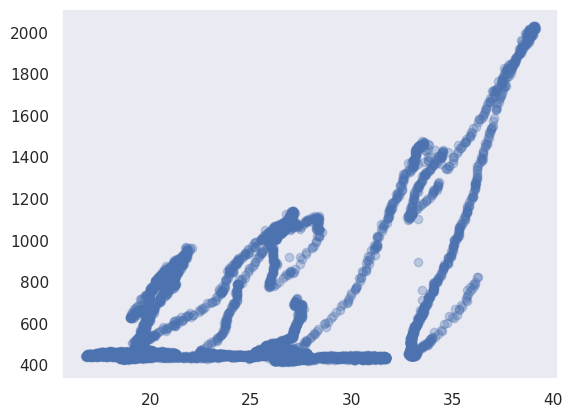

In [ ]:
# Visualizing data

plt.scatter(df_occupancy['Humidity'],df_occupancy['CO2'],alpha=0.3)

/tmp/ipykernel_4689/3533368530.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_occupancy.corr()


<AxesSubplot: title={'center': 'Correlation Matrix'}>

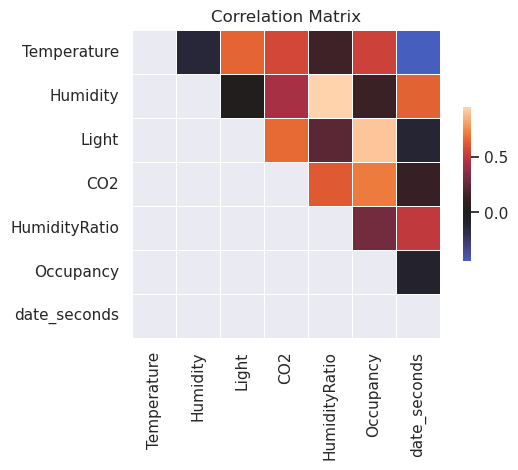

In [ ]:
sns.set_theme(style="dark")
corr = df_occupancy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)).T
f, ax = plt.subplots(figsize=(6,4))
ax.set_title("Correlation Matrix")
# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
svm_occupancy = SVM()
history = svm_occupancy.fit(X_train, y_train,learning_rate=0.001,epochs=50)

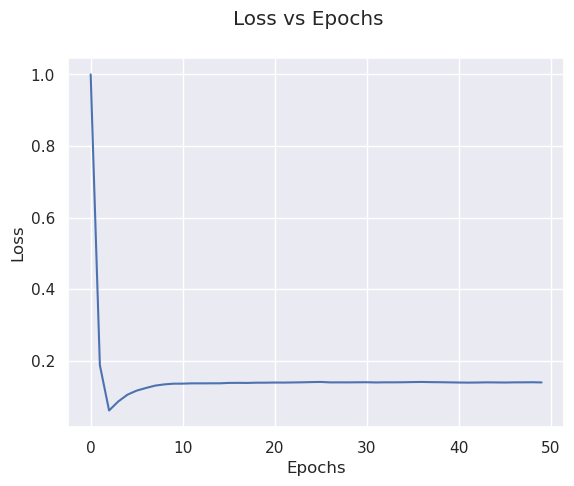

In [ ]:
svm_occupancy.plot_loss()

In [ ]:
X_train.shape

(6514, 6)